# Project: Model Usage - Image Classification and Transfer Learning

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Make a copy of the Project**: Please make a copy of this project either to your own Google Drive or download locally. Work on the copy of the project. The master project is **Read-Only**, meaning you can edit, but it will not be saved when you close the master project. To avoid total loss of your work, remember to make a copy.

2. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
3. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive. This will be the repository for all your completed project files, aiding you in keeping your work organized and accessible.
   
4. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
5. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
6. **Setting Permission to Public**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Project Description:

Welcome to your new project! You will have the opportunity to apply the knowledge and skills you've learned in class.

The tasks are divided into two parts, the first part is to create an image classification project that predicts a person's age based on their photograph. You will be utilizing the power of machine learning pipelines to streamline your workflow and effectively manage the different stages of this project, from data preprocessing to model training and evaluation.

In the second part is transfer learning where you'll use a [Vision Transformer (ViT)](https://huggingface.co/google/vit-base-patch16-224-in21k) model pre-trained on ImageNet-21k and fine-tune it on the [FastJobs/Visual_Emotional_Analysis](https://huggingface.co/datasets/FastJobs/Visual_Emotional_Analysis) dataset for emotion recognition, with the final step being the publication of your trained model to the Hugging Face Model Hub.

Remember, the goal of this assignment is not just to build a model that makes accurate predictions, but also to understand the process of developing a machine-learning pipeline and the role each component plays in this process.

We encourage you to be creative, explore different strategies, and most importantly, have fun while learning. We can't wait to see the innovative solutions you come up with! Best of luck!

## Grading Criteria

There are 2 tasks in this project with 5 criterias for scoring, all except Criteria 4 have the same weight. Each criteria except Criteria 4 will give you either 100 point if you are correct and 0 if you are wrong. The final score for the project will the the average of all 5 criterias from both projects.

* Task-1 Criteria 1: This task will assess your ability to understand how a model is likely to be used, in this use a model from Huggingface (HF) preferably using HF Pipeline, pass the input and get the correct answer form the model's output.

* Task-1 Criteria 2: This task will assess your ability to use Gradio as a UI (User Interface) and interact with the model, in this case, the model used in Task-1 Criteria 1.

* Task-2 Criteria 3: The task will assess your ability to perform transfer learning using a model from Huggingface and publish the new model to Huggingface platform.

* Task-2 Criteria 4: This task will assess your ability to perform transfer learning and perform an evaluation. The accuracy submitted will be used in a Bell Curve Distribution where the average accuracy score will be mapped to a score of 70. This ensures fairness since the accuracy of all students who submit their accuracy score are taken into account and distributed evenly. For example, if the average students score is 56, those who submit their accuracy as 56 will get a score of 70; student with accuracy of 43 will get a score of 60; student with accuracy of 70 will get 80; naturally there is a gradation, meaning the accuracy between 43-56 will get a score between 60 to 70 and so on.

* Task-2 Criteria 5: This task will assess your ability to use Gradio as a UI and interact with more than one models, in this case the model from Task-1 Criteria 1 and Task-2 Criteria 3.


## Student Identity

## Installation and Import Package

In [2]:
# Install necessary packages
#!pip install rggrader
#from rggrader import submit, submit_image
#!pip install transformers datasets evaluate huggingface_hub gradio rggrader accelerate -U
# Put your code here:
import torch
import numpy as np
from transformers import pipeline, AutoImageProcessor, AutoModelForImageClassification, TrainingArguments, Trainer, DefaultDataCollator
from datasets import load_dataset
from evaluate import load
import gradio as gr
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor
from huggingface_hub import notebook_login
# ---- End of your code ----

## Task 1 Image Classification using Pipeline

### Step 1: Image Classification using Hugging Face's Model

In this first task, your task is to develop an image classification pipeline that takes **an image URL as input**, displays the image, and uses the Hugging Face's model to predict the age of the person in the image. You can get the model [here](https://huggingface.co/nateraw/vit-age-classifier).

Here are the key steps that you might be able to follow:

1. **Image URL Input:** Your program should accept an image URL as input. Make sure to handle potential issues with invalid URLs or inaccessible images.
2. **Image Display:** Display the image from the URL in your notebook. This will provide a visual confirmation that the correct image is being processed.
3. **Model Loading and Prediction:** Load the 'nateraw/vit-age-classifier' model from Hugging Face's model hub and pass the image URL to the model to obtain the prediction. The model should predict the age of the person in the image.
4. **Output Display:** Display the output from the model in a clear and understandable manner.

#### Submission

- What percentage is the person in this picture (https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80) is between age of "3-9"?

Submit in the numeric format up to 5 digits behind the decimal point. For example in below output:

```
{'0-2': '0.00152',
 '3-9': '0.00105',
 '10-19': '0.02567',
 '20-29': '3.32545',
 '30-39': '51.75200',
 '40-49': '40.24234',
 '50-59': '4.47803',
 '60-69': '0.17092',
 'more than 70': '0.00304'}
```

The answer would be `0.00105`.

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


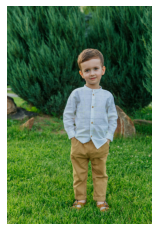

{'3-9': '0.81030', '0-2': '0.09773', '10-19': '0.04795', '20-29': '0.01472', '30-39': '0.01173'}
0.81030


In [3]:
# @title #### 01. Image Classification using Hugging Face's Model

# Put your code here:
def predict_age_from_url(image_url):
    # Load the model pipeline
    classifier = pipeline("image-classification", model="nateraw/vit-age-classifier")
    
    # Get the image from URL
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # Make prediction
    predictions = classifier(image)
    
    # Convert to dictionary format
    results = {pred['label']: f"{pred['score']:.5f}" for pred in predictions}
    return results

# Test the function with the given URL
url = "https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80"
results = predict_age_from_url(url)
answer = results["3-9"]

print(results)
print(answer)

# ---- End of your code ----

# Submit Method
assignment_id = "00_pipeline_and_gradio"
question_id = "01_image_classification_using_hugging_faces_model"
answer = "" # Put your answer here
submit(student_id, name, assignment_id, answer, question_id, drive_link)

### Step 2: Image Classification using Hugging Face's Model and Gradio

In this second task, you will create a user-friendly interface using Gradio for your image classification pipeline that you created in Task 1. The difference with task 1 is, that in this task, you use **image files as input**, process them through the Hugging Face model, and display predictions output. The output displayed is **only the results with the highest `score`**.

Here are the key steps that you might be able to follow:

1. **Image Input:** Create a function to accept an image file as input. The image should be in a format that can be processed by the model.
2. **Model Loading and Prediction:** Load the model from Hugging Face's model hub and pass the image to the model to obtain the prediction. The model predicts the age of the person in the image.
3. **Gradio Interface:** Use Gradio to create a user-friendly interface for your application. The interface should allow users to upload an image file, and it should display the model's output in a clear and understandable manner.
4. **Interface Launch:** Launch the Gradio interface. Make sure that the interface is accessible and easy to use.

#### Submisssion

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

You need to submit screenshot of your Gradio's app. In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

- You should upload a person's image to that app
- The score should be included at the screenshot


In [4]:
# @title #### 02. Image Classification using Hugging Face's Model and Gradio

# Put your code here:

def predict_age(image):
    if isinstance(image, np.ndarray):  # If image is a NumPy array, convert it
        image = Image.fromarray(image)

    device = "cuda" if torch.cuda.is_available() else "cpu"
    classifier = pipeline("image-classification", model="nateraw/vit-age-classifier")
    predictions = classifier(image)
    # Get the prediction with highest score
    max_pred = max(predictions, key=lambda x: x['score'])
    return {"score": round(max_pred["score"], 10), "label": max_pred["label"]}

demo = gr.Interface(
    fn=predict_age,
    inputs=gr.Image(),
    outputs="json",
    title="Age Classification"
)

demo.launch(share=True)
# ---- End of your code ----

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://8294fb012508eb916b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Example of Expected Output:

![gradio-result](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/gradio-result.png)

# Submit Method
question_id = "02_image_classification_using_hugging_faces_model_and_gradio"
submit_image(student_id, question_id, './submission.jpg')


> Note: If your submission for Task-2 did not run (After you run it never changes from "*" to a number), stop the Code block that's running the Gradio app, then the submission will run. To stop the Code block, you can click on the Code block and then click the stop button.

# Task 2: Transfer Learning for Emotion Recognition

### Step 1: Environment Setup

In this section, we start by installing the necessary packages and logging into Hugging Face's platform:
- `transformers`
- `datasets`
- `evaluate`
- `huggingface_hub`

In [5]:
# Install necessary packages
#!pip install datasets evaluate huggingface_hub accelerate -U
# Put your code here:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from transformers import TrainingArguments, Trainer, DefaultDataCollator
from datasets import load_dataset
from evaluate import load
from huggingface_hub import notebook_login

# ---- End of your code ----

After installing, use the Hugging Face's notebook login function to log into Hugging Face's platform. Execute the following commands in your cell:

In [6]:
# Log into Hugging Face's platform

# Put your code here:
# Login to Hugging Face
notebook_login()
# ---- End of your code ----

### Step 2: Load the Dataset

Load the "FastJobs/Visual_Emotional_Analysis" dataset and split it into training and test sets with a test size of 0.2.

> **Note**: please assign to variable `emotion`

In [7]:
# Load the dataset and split it

# Update your code here:
emotion = load_dataset("FastJobs/Visual_Emotional_Analysis")
emotion = emotion["train"].train_test_split(test_size=0.2)

# Create label mappings
labels = emotion["train"].features["label"].names
label2id = {label: str(i) for i, label in enumerate(labels)}
id2label = {str(i): label for i, label in enumerate(labels)}
# ---- End of your code ----

Resolving data files:   0%|          | 0/800 [00:00<?, ?it/s]

**Label Mapping**

> **Note**: no need to change the code below! Just run it to map labels from the dataset.

In [8]:
labels = emotion["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

### Step 3: Explore and Visualize the Dataset

In this step, you are required to visualize the first instance in the training dataset.

> **Note**: no need to change the code below! Just run it to visualize the dataset based on index.

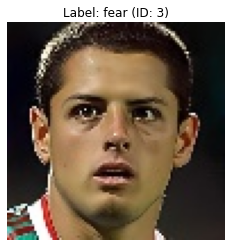

In [9]:
import matplotlib.pyplot as plt

# Define the function to convert label index to label name
id2label_view = {str(i): label for i, label in enumerate(labels)}

# Use first training example
image = emotion['train'][0]['image'] # Explore image by index
label_id = str(emotion['train'][0]['label'])
label_name = id2label_view[label_id]

# Display the image and its corresponding label
plt.imshow(image)
plt.title(f'Label: {label_name} (ID: {label_id})')
plt.axis('off')
plt.show()

### Step 4: Preprocess the Data

You need to define the transformation function for image preprocessing and apply it to the dataset.

In [10]:
from transformers import AutoImageProcessor
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

# Load the image processor, Define the transforms, Define the transformation function and Apply the transformation function

# Put your code here:
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
size = (
    image_processor.size["height"],
    image_processor.size["width"],
)

transform = Compose([RandomResizedCrop(size), ToTensor(),  Normalize(mean=image_processor.image_mean, std=image_processor.image_std)])

def transform_example(example):
    image = example["image"]  # Extract image
    image = transform(image)  # Apply transformation
    example["pixel_values"] = image  # Store transformed image
    del example["image"]  # Remove original image key to avoid errors
    return example

emotion_transformed = emotion.map(transform_example)

# ---- End of your code ----

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Map:   0%|          | 0/640 [00:00<?, ? examples/s]

Map:   0%|          | 0/160 [00:00<?, ? examples/s]

### Step 5: Model Setup

In this step, define the model architecture with the pre-trained ViT model and load it.

In [11]:
from transformers import AutoModelForImageClassification

# Define the model

# Put your code here:
model = AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
)
# ---- End of your code ----

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Step 6: Training Setup

Define the training arguments and instantiate the trainer.

In [12]:
import evaluate

# Load accuracy metric

# Put your code here:
metric = load("accuracy")


# ---- End of your code ----

In [13]:
# Define compute metric function

# Put your code here:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.argmax(axis=1)
    return metric.compute(predictions=predictions, references=labels)

# ---- End of your code ----

In [14]:
from transformers import TrainingArguments, Trainer

# Define training arguments

# Update your code here:
# Define training arguments
training_args = TrainingArguments(
    output_dir="emotion-classifier",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
)

# ---- End of your code ----

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


To use Hugging Face `Trainer` you need to install the `accelerate` library version `0.20.1` or later. It is used for performance enhancement on PyTorch.

In [15]:
%pip install accelerate -U


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from transformers import DefaultDataCollator

# Instantiate the trainer

# Update your code here:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_transformed["train"],
    eval_dataset=emotion_transformed["test"],
    compute_metrics=compute_metrics,
    data_collator=DefaultDataCollator(),
)
# ---- End of your code ----

: 

If there are problems when using the Trainer after installing `accelerate` you can restart the Kernel

### Step 7: Train and Evaluate the Model

Now, you are ready to train the model and evaluate it on the test set.

In [ ]:
# Train the model

# Put your code here:
trainer.train()
# ---- End of your code ----

In [ ]:
# Evaluate the model

# Update your code here:
eval_result = trainer.evaluate()

# ---- End of your code ----

# Save the formatted accuracy in a variable
accuracy_str = "{:.4f}".format(eval_result["eval_accuracy"])
print(f"Accuracy: {accuracy_str}")


### Step 8: Publishing the Trained Model

Finally, make sure to push your trained model to the Hugging Face Model Hub.

> **Note**: No need to change the code below! Just run to publish your model.

In [ ]:
trainer.push_to_hub()

Once you've trained your model and pushed it to the Hugging Face Model Hub, you'll have a link that points directly to your model's page. You can share this link with others, and they can use it to directly load your model for their own uses.

The following link is an example of what a trained model's page looks like: https://huggingface.co/aditira/emotion_classification. This is not your model, but rather an example of what your final result might resemble.

Remember, for this project you should push your output model to your own Hugging Face account. The link for your model will be different and should reflect your own username and model name.

# Submit Method
huggingface_model_link = "" # Put your model link

assignment_id = "00_transfer_learning"
question_id = "00_emotion_recognition_huggingface"
submit(student_id, name, assignment_id, huggingface_model_link, question_id, drive_link)

question_id = "01_emotion_recognition_accuracy"
submit(student_id, name, assignment_id, accuracy_str, question_id, drive_link)

### Step 9:  Build an Interactive Application with Gradio

In this task, you will be building an interactive application using Gradio that will use your fine-tuned emotion recognition model along with another pretrained model ('`nateraw/vit-age-classifier`') to guess the emotion and age from an input image.

Please make sure to:
- Install the necessary package (`gradio`) for creating the web-based interface.
- Load your fine-tuned model as well as the pretrained model '`nateraw/vit-age-classifier`'.
- Define a function that will take an image as input and return the predicted emotion and age.
- Utilize Gradio to create an Interface (UI) for your function, allowing users to upload images and see the predicted emotion and age.

In [ ]:
# Install Gradio
!pip install gradio

#### Submisssion

![Upload colab](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/upload-colab.png)

You need to submit screenshot of your Gradio's app. In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

- Image name screenshot is `submission.jpg`
- You should upload a person's image to that app
- The score should be included at the screenshot

In [ ]:
# Put your code here:
def predict_age_and_emotion(image):
    # Age prediction
    age_classifier = pipeline("image-classification", model="nateraw/vit-age-classifier")
    age_pred = age_classifier(image)
    max_age_pred = max(age_pred, key=lambda x: x['score'])
    
    # Emotion prediction
    # Replace YOUR_USERNAME with your actual Hugging Face username
    emotion_classifier = pipeline("image-classification", model="YOUR_USERNAME/emotion-classifier")
    emotion_pred = emotion_classifier(image)
    max_emotion_pred = max(emotion_pred, key=lambda x: x['score'])
    
    return (
        f"Age: {max_age_pred['label']} (confidence: {max_age_pred['score']:.5f})",
        f"Emotion: {max_emotion_pred['label']} (confidence: {max_emotion_pred['score']:.5f})"
    )

demo_combined = gr.Interface(
    fn=predict_age_and_emotion,
    inputs=gr.Image(),
    outputs=["text", "text"],
    title="Age and Emotion Classification"
)

demo_combined.launch()
# ---- End of your code ----

Example of Expected Output:

![gradio-result](https://storage.googleapis.com/rg-ai-bootcamp/project-4-transfer-learning/gradio_emotion_age_app.png)

> Note: If your submission for Task-2 did not run (After you run it never changes from "*" to a number), stop the Code block that's running the Gradio app, then the submission will run. To stop the Code block, you can click on the Code block and then click the stop button.